WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 36 seconds.


Output()

MAP estimate of θ: 0.25000030581999383
Posterior mean of θ: 0.335


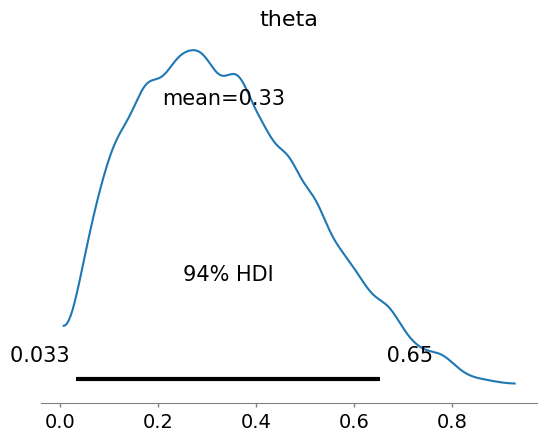

In [1]:
import pymc as pm
import numpy as np
import arviz as az

# Generate some sample data (you should replace this with your actual observation)
# Let's say we observed getting success at the 5th trial
observed_data = 5

# Create the PyMC model
with pm.Model() as geometric_model:
    # Prior for θ (probability of success)
    # Using a Beta prior as it's conjugate to Bernoulli/Geometric
    theta = pm.Beta('theta', alpha=1, beta=1)  # Uniform prior between 0 and 1
    
    # Likelihood (Geometric distribution)
    # PyMC's Geometric distribution expects p as probability of success
    y = pm.Geometric('y', p=theta, observed=observed_data-1)  # subtract 1 because PyMC uses 0-based counting
    
    # Sample from the posterior
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Analyze results
with geometric_model:
    # Find MAP (Maximum A Posteriori) estimate
    map_estimate = pm.find_MAP()
    
    # Print summary of posterior
    print("MAP estimate of θ:", map_estimate['theta'])
    
    # Plot posterior distribution
    az.plot_posterior(trace, var_names=['theta'])
    
    # Calculate mean of posterior
    posterior_mean = float(az.summary(trace)['mean']['theta'])
    print("Posterior mean of θ:", posterior_mean)

# If you want to get the full posterior samples for theta:
theta_samples = trace.posterior['theta'].values.flatten()